# Packages

In [1]:
import pandas as pd
import ast
from camera_prediction import split_angles, calculate_mean_angles, count_differences, split_distances, normalize_columns, check_finger_place, split_place, get_camera_data
from model_prediction import grid_search, corr_visual, count_results
from sklearn.model_selection import train_test_split
from joblib import load

pygame 2.5.2 (SDL 2.28.3, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\izaol\PycharmProjects\projektbigdata\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\izaol\PycharmProjects\projektbigdata\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\izaol\PycharmProjects\projektbigdata\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototy

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get data

In [3]:
data = pd.read_excel('output.xlsx')

In [4]:
data

,Unnamed: 0,filename,width,height,class,xmin,ymin,xmax,ymax,image,rectangle,points
0,0,2_141_jpg.rf.ac6593e08df76f1879a9291ad0b48225.jpg,640,480,2,43,100,364,415,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,[[[102 102 102]\n [110 110 110]\n [124 124 1...,"[[0, 503, 390], [1, 413, 372], [2, 368, 313], ..."
1,1,4_193_jpg.rf.aca8d120735b1e2ed7106ccc258c5e06.jpg,640,480,4,25,41,451,396,[[[ 1 0 4]\n [ 1 0 4]\n [ 1 0 4]\n .....,[[[217 211 198]\n [217 211 198]\n [216 210 1...,"[[0, 312, 406], [1, 254, 365], [2, 226, 307], ..."
2,2,1_55_jpg.rf.acb1e79c71e47fce6e874d5a6054323c.jpg,640,480,1,211,117,451,480,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,[[[255 237 236]\n [255 237 236]\n [255 237 2...,"[[0, 354, 426], [1, 372, 391], [2, 356, 350], ..."
3,3,3_11_jpg.rf.acb7d948dd8f7c8d663c175e1ee3cc2e.jpg,640,480,3,0,82,407,398,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,[[[210 202 189]\n [210 202 189]\n [210 202 1...,"[[0, 330, 359], [1, 315, 298], [2, 353, 238], ..."
4,4,0_149_jpg.rf.acca3ee23cbedc4e1ba865ce87ed7bfe.jpg,640,480,0,171,134,410,312,[[[143 150 145]\n [145 152 147]\n [144 151 1...,[[[145 147 141]\n [145 147 141]\n [145 147 1...,"[[0, 341, 305], [1, 286, 258], [2, 254, 203], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1536,1719,4_106_jpg.rf.572384212e05208f63013026d65177b5.jpg,640,480,4,60,67,502,480,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,[[[136 140 135]\n [136 140 135]\n [136 140 1...,"[[0, 431, 475], [1, 499, 416], [2, 525, 329], ..."
1537,1720,2_151_jpg.rf.571934bb45c2c6e4cfa3d2354228dd1e.jpg,640,480,2,270,151,526,404,[[[ 95 102 99]\n [100 107 104]\n [107 114 1...,[[[106 106 106]\n [ 85 85 85]\n [ 85 85 ...,"[[0, 282, 431], [1, 325, 366], [2, 304, 308], ..."
1538,1722,1_138_jpg.rf.572f5c3c6db898944afbcdc2cd8e48e8.jpg,640,480,1,153,218,553,480,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,[[[226 200 193]\n [226 200 193]\n [227 201 1...,"[[0, 142, 393], [1, 125, 364], [2, 137, 337], ..."
1539,1723,0_96_jpg.rf.574130005698161777f953a9af58e483.jpg,640,480,0,81,76,587,420,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,[[[ 82 83 81]\n [ 84 85 83]\n [ 86 87 ...,"[[0, 180, 321], [1, 267, 352], [2, 403, 319], ..."


# Change type of data

I load dataset from Excel, so now I need to change type from string to list

In [5]:
def get_list(row):      
       return ast.literal_eval(row)

In [6]:
data['points'] = data['points'].apply(get_list)

# Calculate angles between fingers

I calculate angles between fingers. 
first angle is between thumb and index finger
second angle is between index finger and middle finger
third angle is between middle finger and ring finger
fourth angle is between ring finger and pinky finger

In [7]:
data['fingers_angles'] = data['points'].apply(calculate_mean_angles)

angles_split = data['fingers_angles'].apply(split_angles)

data = pd.concat([data, angles_split], axis=1)

# Calculate distances between fingers, stnadardized based on length of fingers

I calculate distance between fingers' tips
first distance is between thumb and index finger
second distance is between index finger and middle finger
third distance is between middle finger and ring finger
fourth distance is between ring finger and pinky finger

In [8]:
data['fingers_distances'] = data['points'].apply(count_differences)

distances_split = data['fingers_distances'].apply(split_distances)

data = pd.concat([data, distances_split], axis=1)

# Calculate if finger is crossed

I compare distance between fingers and some place to cechk if they are crossed

In [9]:
data['fingers_place'] = data['points'].apply(check_finger_place)

distances_split = data['fingers_place'].apply(split_place)

data = pd.concat([data, distances_split], axis=1)

# Extract features from dataset

I prepare new variables to store only necessary data

In [10]:
fingers_data = data[[ 'first_angle', 'second_angle', 'third_angle', 'fourth_angle', 'first_distance', 'second_distance',
       'third_distance', 'fourth_distance', 'first_place', 'second_place', 'third_place',
       'fourth_place', 'class']]

In [11]:
fingers_data

,first_angle,second_angle,third_angle,fourth_angle,first_distance,second_distance,third_distance,fourth_distance,first_place,second_place,third_place,fourth_place,class
0,38.769656,9.940013,110.586253,73.534075,1.112397,0.268284,2.404591,1.122685,1.170575,1.830739,1.554202,2.074247,2
1,37.449579,22.059049,19.811871,17.937086,1.491072,0.749643,0.616630,0.609267,1.144748,1.641433,1.258958,1.061022,4
2,53.514946,152.030753,26.717646,17.413854,1.480206,2.119713,0.558565,0.641557,0.993635,1.492077,1.317018,0.969646,1
3,20.800385,6.536047,10.543763,119.053826,0.770024,0.468065,0.418385,2.021872,1.123754,1.351374,1.170377,1.051014,3
4,162.584561,22.913403,15.229679,35.299770,0.708588,1.097071,0.929256,1.095018,1.419149,3.937830,2.449823,1.555419,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,37.657064,13.505529,12.897006,15.658103,1.247666,0.635999,0.531055,0.583075,1.151932,1.641918,1.289219,1.104866,4
1537,32.853072,3.621593,85.875864,27.164229,0.931134,0.399422,2.014089,0.685652,1.072765,1.522117,1.325540,1.997115,2
1538,22.732813,155.814796,22.861499,8.147543,1.783563,1.965783,0.474167,0.447145,0.792213,1.268078,1.166835,0.945961,1
1539,112.376647,40.449641,19.088951,3.106167,0.757708,0.804386,0.505524,0.544575,1.247584,1.719886,1.059853,0.913726,0


# Save dataset

In [12]:
fingers_data.to_csv('selected_features.csv', index=False)

# Normalization

I decide to norm connected rows for example angles, distances, places separately.
From a practical standpoint, L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. L1 is therefore useful for feature selection, as we can drop any variables associated with coefficients that go to zero. L2, on the other hand, is useful when you have collinear/codependent features.

In [13]:
angle_columns = ['first_angle', 'second_angle', 'third_angle', 'fourth_angle']
normalized_angles = normalize_columns(fingers_data, angle_columns)

distance_columns = ['first_distance', 'second_distance', 'third_distance', 'fourth_distance']
normalized_distances = normalize_columns(fingers_data, distance_columns)

place_columns = ['first_place', 'second_place', 'third_place', 'fourth_place']
normalized_place = normalize_columns(fingers_data, place_columns)

fingers_data[angle_columns] = normalized_angles
fingers_data[distance_columns] = normalized_distances
fingers_data[place_columns] = normalized_place

C:\Users\izaol\AppData\Local\Temp\ipykernel_18072\1735066311.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fingers_data[angle_columns] = normalized_angles
C:\Users\izaol\AppData\Local\Temp\ipykernel_18072\1735066311.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fingers_data[distance_columns] = normalized_distances
C:\Users\izaol\AppData\Local\Temp\ipykernel_18072\1735066311.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

# Split datasets - features and label

It will be useful to train_test_split function

In [14]:
features = fingers_data.drop(columns=['class'])
labels = fingers_data['class']

# Splitting 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=123)

# Model

Grid Search is a hyperparameter tuning technique used in machine learning to find the best combination of hyperparameters for a given model.

In [16]:
svm_params = {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
lda_params = {'solver': ['svd', 'lsqr']}
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
    

In [17]:
grid_search(X_train, y_train, svm_params, lda_params, dt_params)

Najlepsze parametry dla SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Najlepsza dokładność (accuracy) dla SVC: 0.99

Najlepsze parametry dla LinearDiscriminantAnalysis: {'solver': 'svd'}
Najlepsza dokładność (accuracy) dla LinearDiscriminantAnalysis: 0.96
Najlepsze parametry dla DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': None}
Najlepsza dokładność (accuracy) dla DecisionTreeClassifier: 0.98


# Correlation

A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

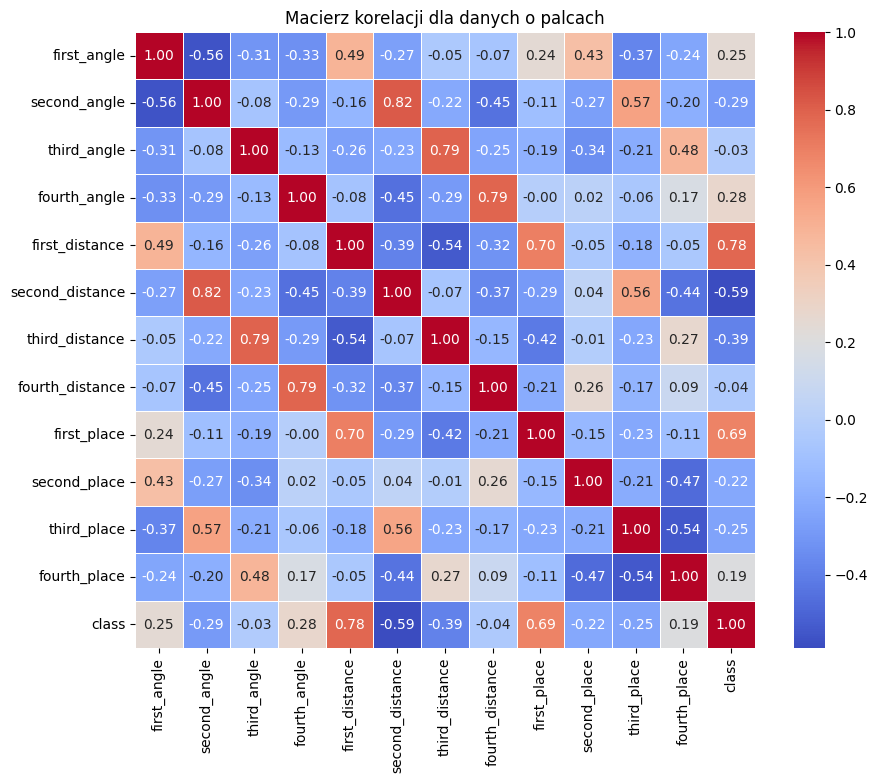

In [18]:
corr_visual(fingers_data)

# Confusion matrix

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm

F1-score: 0.99


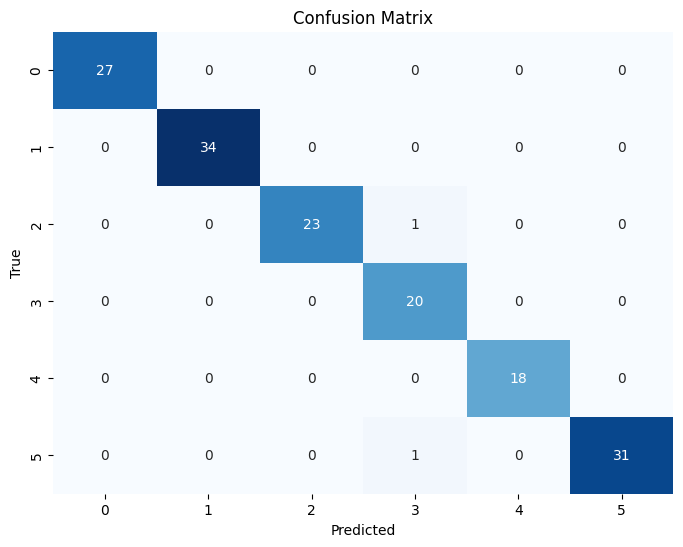

In [19]:
svm_model = load('SVC()-model.joblib')
y_pred = svm_model.predict(X_test)

count_results(y_pred, y_test)

# Show in-real time 

In [20]:
get_camera_data('SVC()-model.joblib', True)

C:\Users\izaol\PycharmProjects\projektbigdata\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


error: Library not initialized